# Research On Car Sales Ads


# Table of contents:
* [1 Purpose](#purpose)
* [2 Hypothesis](#hypothesis)
* [3 Description of the data](#description)
* [4 Open the data file and study the general information.](#info)
    * [4.1 Conclusion](#conclusion)
* [5 Data preprocessing](#preprocessing)
    * [5.1 Visualization](#visuals)
    * [5.2 Missing Values](#missingValues)
    * [5.3 Data type replacement](#dataReplacement)
    * [5.3 Duplicates](#duplicates)
* [6 Make calculations and add them to the table](#calculations)
    * [6.1 Converting dates](#converting_dates)
    * [6.2 converting categorical data](#converting_categorical_data)
* [7 Carry out exploratory data analysis](#EDA)
    * [7.1 Visual](#visuals)
        * [7.1.1 Odometer](#odometer)
        * [7.1.2 Price](#price)
        * [7.1.3 Cylinders](#cylinders)
        * [7.1.4 Average milage a year](#avg_mil_year)
        * [7.1.5 Days Listed](#days_listed)
    * [8 Outliers](#outliers)
        * [8.0.1 Outlier Removal for price](#Outlier_Removal_for_price)
        * [8.0.2 Outliers removed from Odometer](#outlier_odometer)
        * [8.0.3 Outliers Removed from avg_mil_year](#outlier_avg_mil_year)
        * [8.0.4 Outliers removied for days_listed](#outliers_days_listed)
    * [8.1 Days advertisements were displayed](#days_advertisted)
        * [8.1.1 Analyze numer of ads and average price for vehicle](#analyze_price)
        * [8.1.2 Average price for each type of vehicle](#avg_price)
        * [8.1.3 Plot the number of ads on the vehicle type](#ads_vehicle)
        * [8.1.4 Select the two types with the greatest number of ads.](#nub_ads)
        * [8.1.5 What factors impact the price most?](#important_price)
            * [8.1.5.1 Model_year vs Price](#model_year_by_price)
            * [8.1.5.2 Average milage a year vs Price](#avg_mil_price)
            * [8.1.5.3 Condition vs price](#Condition_by_price)
            * [8.1.5.4 Cylinders vs Price](#Cylinders_by_Price)
            * [8.1.5.5 is_wd vs price](#is_4wd_price)
            * [8.1.5.6 vehicle_age vs price](#vehicle_age_price)
            * [8.1.5.7 Odometer vs price](#odometer_by_price)
            * [8.1.5.8 Transmission vs price](#transmission_by_price)
            * [8.1.5.9 Color vs price](#color_by_price)
            * [8.1.5.10 Conclusion](#conclusion1)
    * [9 Overall conclusion](#Overall_conclusion)

## Purpose: <a class="anchor" id="purpose"></a>

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

## Hypothesis:<a class="anchor" id="hypothesis"></a>
Factors such as model year, model, condition, fuel, color, odometer influences price of a vehicle.

- Newer model cars are a higher price than old ones.
- Certain model cars are worth more than others.
- Condition of the car plays an impact on whether a car is worth more or less. New cars should be worth more than older ones.
- Fuel type of a car plays a factor in whether a car is worth more or less. Diesel cars should be worth more than regular gas cars since they give more energy than gas does. 
- Certain color cars should be more expensive than others. Depending on which color is in style will sell more than others.

## Description of the data <a class="anchor" id="description"></a>
- The dataset contains the following fields:
    - price
    - model_year
    - model
    - condition
    - cylinders
    - fuel — gas, diesel, etc.
    - odometer — the vehicle's mileage when the ad was published
    - transmission
    - paint_color
    - is_4wd — whether the vehicle has 4-wheel drive (Boolean type)
    - date_posted — the date the ad was published
    - days_listed — from publication to removal

## Open the data file and study the general information. <a class="anchor" id="info"></a>

In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the dataset 
try:
    df = pd.read_csv('vehicles_us.csv')
except:
    df = pd.read_csv('/datasets/vehicles_us.csv')

In [3]:
#looking at the first 10 data in our dataset
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [4]:
df.describe(include = 'all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### Conclusion <a class="anchor" id="conclusion"></a>

The dataset itself has some missing values. We can see the 'model_year' column has floating-point data which needs to be changed to an integer, and we can see how some categorical data can be grouped into numerical ones.
- There are 51525 entries and 13 columns.
- Some data entries need to be converted to int from float.
- We have 4: float64, 2: int64, 7: objects in the dataset.
- We need to convert some floating-point values to int.


## Data preprocessing<a class="anchor" id="preprocessing"></a>

### Visualization<a class="anchor" id="visuals"></a>

Text(0.5, 0.98, 'Visuals of the orginal dataset.')

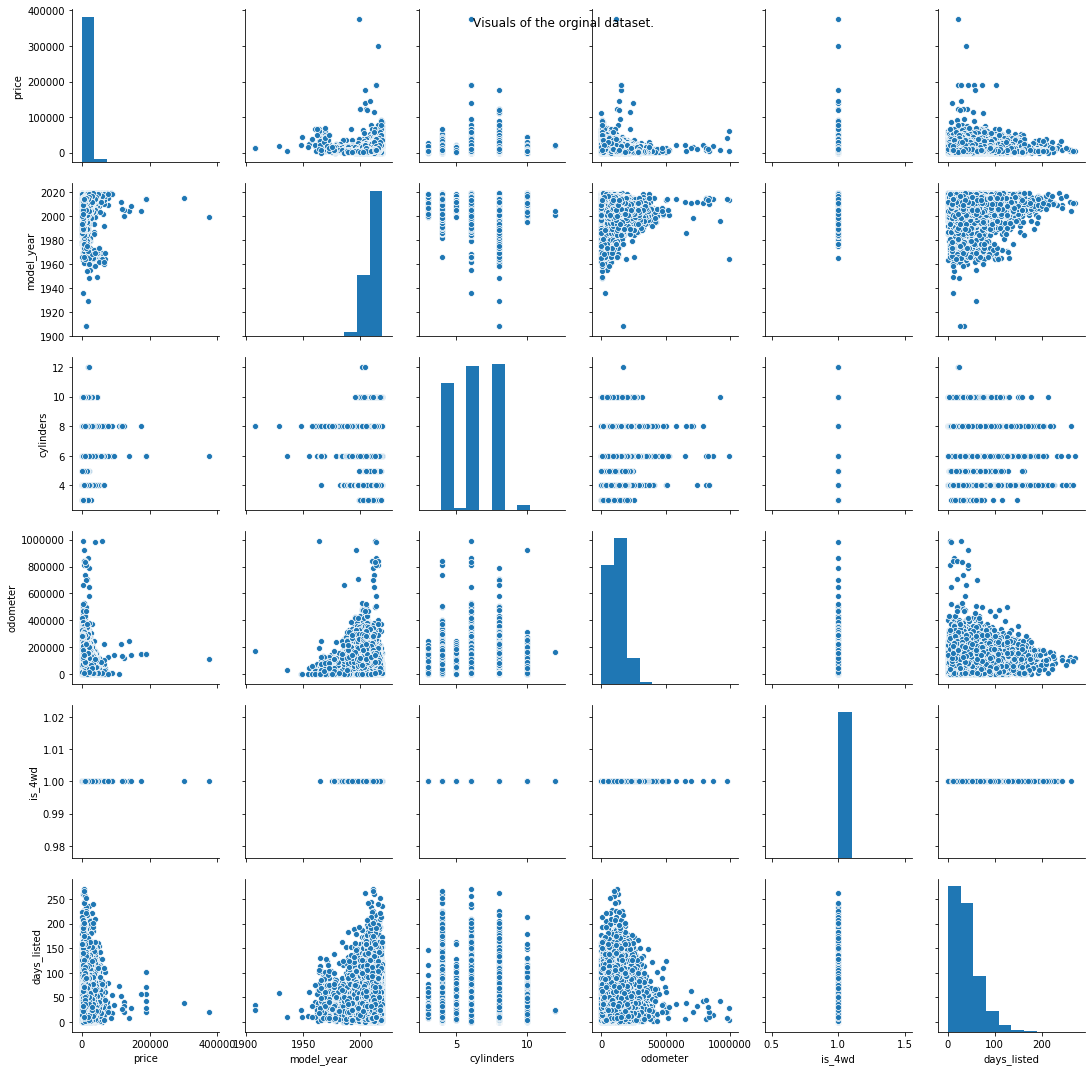

In [6]:
#visualization of the dataset distributions before data processing
sns.pairplot(df)
plt.suptitle('Visuals of the orginal dataset.')

Visulization of a the dataset matrix. We can see how each variable is affected with each other and how there is outlers in the data too, which we would need to figure out later on.

### Missing Values <a class="anchor" id="missingValues"></a>

In [7]:
#total number of missing values in our dataset.
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Missing data present in 'model_year', 'cylinders', 'odometer', 'paint_color', and 'is_4wd'.

In [8]:
#percent of missing values
df.isna().sum()*100/len(df) # I tried out the other options :)

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

When checking for missing values we can see there are missing values present in the dataset. There is a 50% data missing data in our'is_4wd' column. I believe the missing data is for that particular column is the result of our 0 values being a NaN format. Since the 'is_4wd' column looks to be a binary column that accepts 1 and 0 values. The 1 represents this is a 4 wheel vehicle and 0 means it's not. We need to go ahead make that change to the dataset.

- We will be filling in missing values for 'is_4wd' with 0.
- Filling the NaN values for 'paint_color' with a categorical value since we cant fill it with the median.
- For 'odometer' there are outliers present and we are missing 15% of our data so we will by replaced with the median through grouping the variable condtion.
- For 'cylinders' and 'model_year' have less than 10% of missing values will by the median value through grouping with the variable 'model'.

In [9]:
#filling in 0 inplace of our NaN values in 'is_4wd' column.
df['is_4wd'].fillna(0,inplace = True)

In [10]:
#checking the unique colors in paint_color columns
df['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

Will covert the NaN for this column into 'missing' since we don't know the color.

In [11]:
#filling in the missing values for paint_color to 'missing'
df['paint_color'] = df['paint_color'].fillna('missing')

In [12]:
df['price'].isna().sum()

0

In [13]:
#Replace missing values with the medians, grouping the data by these parameters.
df['odometer'] = df.groupby(['condition']).odometer.transform(lambda x: x.fillna(x.median()))
df['cylinders'] = df.groupby(['model']).cylinders.transform(lambda x: x.fillna(x.median()))
df['model_year'] = df.groupby(['model']).model_year.transform(lambda x: x.fillna(x.median()))

In [14]:
#checking the total missing values 
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

### Data type replacement<a class="anchor" id="dataReplacement"></a>

We are converting our float values to ints for the data. We are doing this since we would like whole numbers instead of floating-point ones in the dataset. These rows selected below will be converted to integers and the rest of the columns for the dataset are categorical data which is why they are not getting converted to ints. We will only have the exception of price being floating-point values since values such as price aren't restricted whole numbers and can vary.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null float64
fuel            51525 non-null object
odometer        51525 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [16]:
#converting floats to int values
df['odometer'] = df['odometer'].astype('int')
df['model_year'] = df['model_year'].astype('int')
df['is_4wd'] = df['is_4wd'].astype('bool')
df['cylinders'] = df['cylinders'].astype('int')                                         
# change `date_posted` to datetime
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d %H:%M:%S', errors='raise')


In [17]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,missing,True,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,missing,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28


In [18]:
#checking the the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null int64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null int64
fuel            51525 non-null object
odometer        51525 non-null int64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(5), object(6)
memory usage: 4.8+ MB


### Duplicates <a class="anchor" id="duplicates"></a>

In [19]:
# Checking for duplicates!
df.duplicated().sum()

0

Looks like we have no duplicates in our dataset!

## Make calculations and add them to the table<a class="anchor" id="calculations"></a>

### Converting dates<a class="anchor" id="covert_dates"></a>

We will be creating new columns to add to our dataset for dates posted such as 'days of the week', ' month', 'year', and format date posted. 

In [20]:
#calculated and added to the table: day of the week, month, and year the ad was placed

#creating days of week(dow) column for when the ad was placed
df['dow'] = df['date_posted'].dt.dayofweek

# creating month column for when the ad was placed
df['month'] = df['date_posted'].dt.month

# creating year column for when the ad was placed
df['year'] = df['date_posted'].dt.year

In [21]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,month,year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,missing,True,2018-06-23,19,5,6,2018
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,missing,False,2019-03-22,9,4,3,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
price           51525 non-null int64
model_year      51525 non-null int64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null int64
fuel            51525 non-null object
odometer        51525 non-null int64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dow             51525 non-null int64
month           51525 non-null int64
year            51525 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(8), object(6)
memory usage: 5.9+ MB


In [23]:
#calculated and added to the table: the vehicle's age (in years) when the ad was placed

df['vehicle_age'] = df['year'] - df['model_year']

We are taking year ad placed and subtracting it with model year to find the age of the vehicle.

In [24]:
#calculated and added to the table: the vehicle's average mileage per year

df['avg_mil_year'] = df['odometer']/ df['vehicle_age']

To get the average milage of years we need to divide the vehicle's total mileage by the number of years you've owned the car to get the average mileage a year.

In [25]:
df.describe()

,price,model_year,cylinders,odometer,days_listed,dow,month,year,vehicle_age,avg_mil_year
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,5.152300e+04
mean,12132.464920,2009.793557,6.121067,115199.007278,39.55476,3.005434,6.628491,2018.307462,8.513906,inf
std,10040.803015,6.099381,1.657457,60484.868232,28.20427,1.997759,3.474134,0.461447,6.112976,NaN
min,1.000000,1908.000000,3.000000,0.000000,0.00000,0.000000,1.000000,2018.000000,0.000000,0.000000e+00
25%,5000.000000,2007.000000,4.000000,75668.000000,19.00000,1.000000,3.000000,2018.000000,4.000000,1.058577e+04
50%,9000.000000,2011.000000,6.000000,110908.000000,33.00000,3.000000,7.000000,2018.000000,8.000000,1.527273e+04
75%,16839.000000,2014.000000,8.000000,147821.000000,53.00000,5.000000,10.000000,2019.000000,12.000000,2.285820e+04
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,6.000000,12.000000,2019.000000,110.000000,inf


There are NaN and inf in our data for avg_mil_year. The NaN is in place of standard deviation and inf are in place of mean and max. We need to take care of this and get rid of it. We will take care of this by filling the inf with 0 so we can use it in our dataset.

In [26]:
#filling missing values for 'avg_mil_year' with 0, and replace inf value with 0, 
df['avg_mil_year'] = df['avg_mil_year'].replace(np.inf, int(0))
df['avg_mil_year'].fillna(0, inplace = True)
df['avg_mil_year'] = df['avg_mil_year'].astype(int) # making float into int

In [27]:
# looking into our dataset.
df.describe()

,price,model_year,cylinders,odometer,days_listed,dow,month,year,vehicle_age,avg_mil_year
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793557,6.121067,115199.007278,39.55476,3.005434,6.628491,2018.307462,8.513906,17507.888481
std,10040.803015,6.099381,1.657457,60484.868232,28.20427,1.997759,3.474134,0.461447,6.112976,14737.618819
min,1.000000,1908.000000,3.000000,0.000000,0.00000,0.000000,1.000000,2018.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,75668.000000,19.00000,1.000000,3.000000,2018.000000,4.000000,9769.000000
50%,9000.000000,2011.000000,6.000000,110908.000000,33.00000,3.000000,7.000000,2018.000000,8.000000,14512.000000
75%,16839.000000,2014.000000,8.000000,147821.000000,53.00000,5.000000,10.000000,2019.000000,12.000000,21000.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,6.000000,12.000000,2019.000000,110.000000,279365.000000


### converting categorical data<a class="anchor" id="converting_categorical_dates"></a>

In [28]:
#checking unique values 
df['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [29]:
#convert condition column to str since we can not compare types int and str at the same time.
df['condition'] = df['condition'].astype('str')

In [30]:
#converting catgeorical data from 'condition' to numerical 
df['condition'].replace(to_replace = ['new','like new','excellent', 'good','fair','salvage'],
                        value =[5,4,3,2,1,0], inplace=True)
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,month,year,vehicle_age,avg_mil_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,missing,True,2018-06-23,19,5,6,2018,7,20714
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,7,12672
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,18333
3,1500,2003,ford f-150,1,8,gas,181613,automatic,pickup,missing,False,2019-03-22,9,4,3,2019,16,11350
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,40451


In [31]:
#checking to see the values for condition
df['condition'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

## Carry out exploratory data analysis<a class="anchor" id="EDA"></a>

### Visuals <a class="anchor" id="visuals"></a>

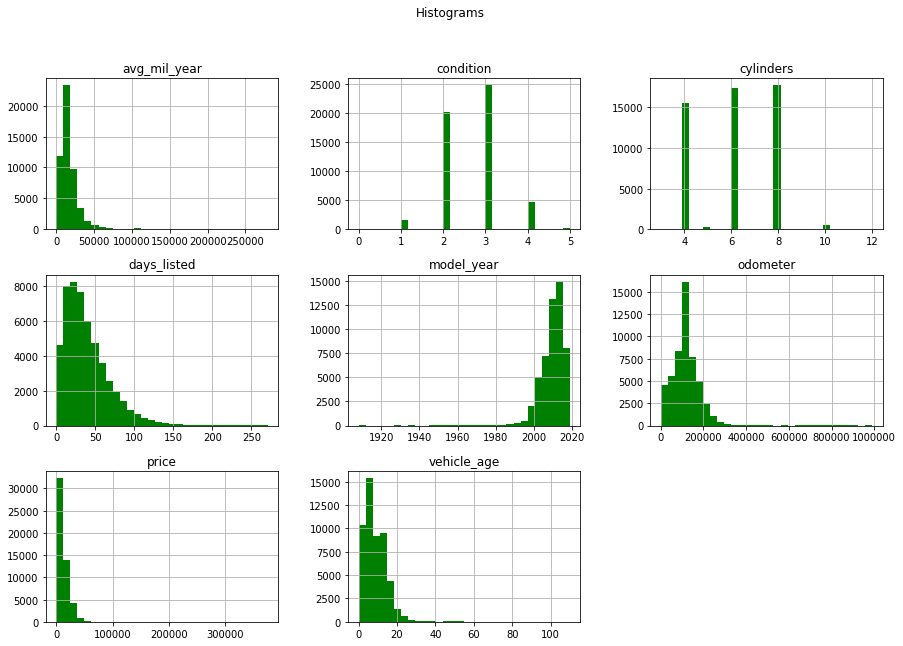

In [32]:
#histogram for data
df[['price', 'model_year', 'odometer', 'days_listed', 'vehicle_age', 'avg_mil_year', 'cylinders', 'condition']].hist(bins=30, figsize=(15, 10), color = 'g')
plt.suptitle('Histograms');


Based off the histograph which were created we can see how some of the data from our dataset is right skeweked and left swkerd, and has outliers present. From these graph we can further look into them in our next steps.

#### Odometer<a class="anchor" id="odometer"></a>

Text(0.5, 1.0, "Histogram of vehicle's mileage")

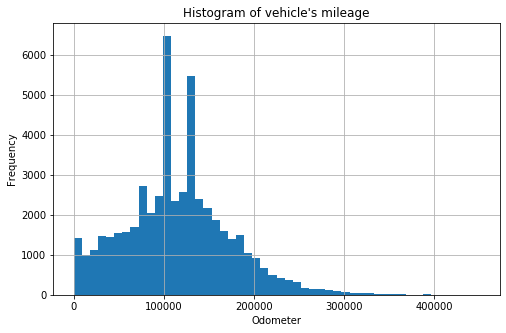

In [33]:
df.hist('odometer',bins=50, range=[0, 450000], figsize = (8,5))
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.title("Histogram of vehicle's mileage")

- 'odometer' represents the vehicle's mileage when the ad was published. We can see how there are outliers present around 400,000. Typical mileage is between 10,000 and 15,000. A 10-year-old car has a mileage of 100,000 to 150,000. So we can see how there is a large amount of cars around 8500 which have a mileage of 115,000. 

#### Price<a class="anchor" id="price"></a>

Text(0, 0.5, 'frequency')

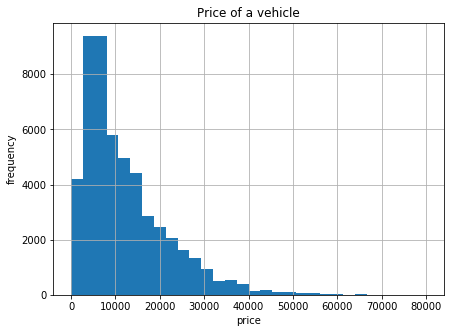

In [34]:
df.hist('price', bins = 30, range = [0,80000], figsize = (7,5))
plt.title("Price of a vehicle")
plt.xlabel('price')
plt.ylabel('frequency')

There seem to be outliers present. The histogram has a long right tail making the graph skewed to the right side. We can see how there is a peak at 7800 in our dataset which is around the 50000 price range.

#### Cylinders<a class="anchor" id="cylinders"></a>

Text(0, 0.5, 'frequency')

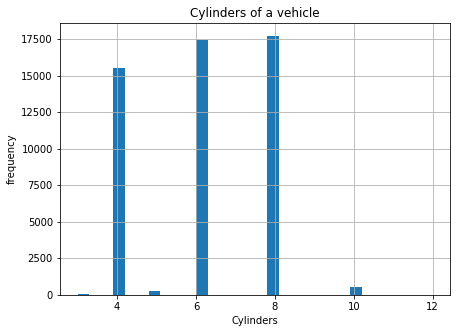

In [35]:
df.hist('cylinders', bins = 30, figsize = (7,5))
plt.title("Cylinders of a vehicle")
plt.xlabel('Cylinders')
plt.ylabel('frequency')

Vehicles that have cylinders of 8,6,4 seem to be the popular. With 8 and 6 being the most popular. We can see how cars with cylinders of 2,5,10 seem to be not as prevalent as much as the others.

#### Condition<a class="anchor" id="condition"></a>

Text(0, 0.5, 'frequency')

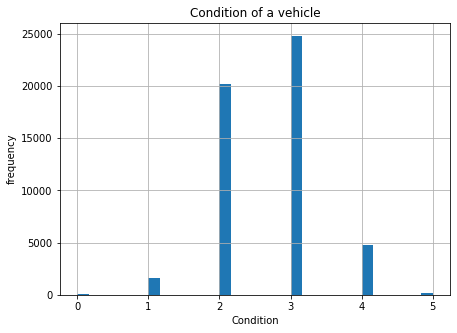

In [36]:
df.hist('condition', bins = 30, figsize = (7,5))
plt.title("Condition of a vehicle")
plt.xlabel('Condition')
plt.ylabel('frequency')

From this histogram, we can see the most vehicles with the condition excellent(3) and good(2) are prevalent in the dataset. In addition, we can see how 'new'(5), fair(1), and 'salvage'(0) seem to have the least amount of cars from those categories in the data.

#### Average milage a year<a class="anchor" id="avg_mil_year"></a>

Text(0, 0.5, 'frequency')

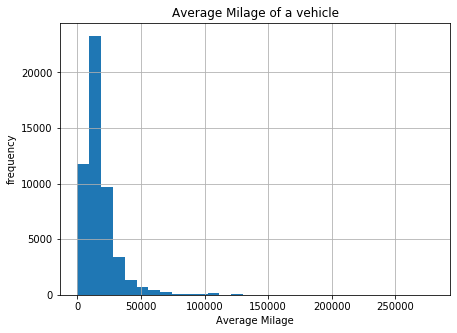

In [37]:
df.hist('avg_mil_year', bins = 30, figsize = (7,5))
plt.title("Average Milage of a vehicle")
plt.xlabel('Average Milage')
plt.ylabel('frequency')

It seems to be that te average milage is 0 for vehicals.

Text(0.5, 1.0, 'Histogram for average milage a year for Vehicale')

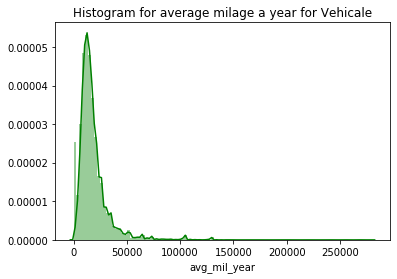

In [38]:
sns.distplot(df['avg_mil_year'], color='g', bins=100);
plt.title("Histogram for average milage a year for Vehicale")

The average milage a year seems to be very high around 10000. In addition, some vehicles seem to have a higher mileage around 100000. 

#### Days listed<a class="anchor" id="days_listed"></a>

Text(0.5, 1.0, 'Histogram of Days listed for Vehicale')

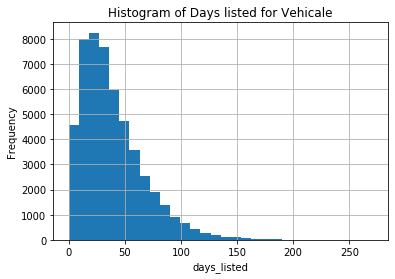

In [39]:
df.hist('days_listed', bins = 30)
plt.xlabel('days_listed')
plt.ylabel('Frequency')
plt.title("Histogram of Days listed for Vehicale")

There seemes to be a vast amount of listing around lisings for under 30 days. The longest listing seem to go for more than 150 days.

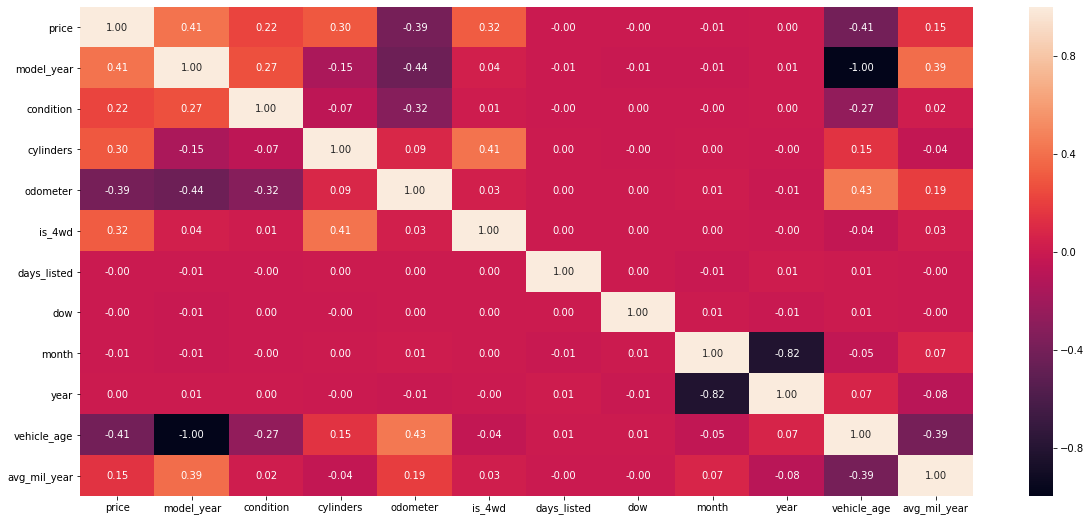

In [40]:
# corrlation table
corr = df.corr()
plt.figure(figsize=(20,9))
a = sns.heatmap(corr, annot=True, fmt='.2f')

Looking at corrlations against price.

- 'is_4wd', 'cylinders', 'avg_mil_year', 'condition', and 'model_year' are postively correlated.
- 'days_listed', 'dow', 'odometer', 'month', 'year', 'vehicle_age' are neagtivly correlated.




## Outliers<a class="anchor" id="outliers"></a>

Upper limit outliers:

* An outlier is defined as being any point of data that lies over 1.5 IQRs below the first quartile (Q1) or above the third quartile (Q3)in a data set.

    - High = (Q3) + 1.5 IQR

    - Low = (Q1) – 1.5 IQR

    - IQR = Q3 - Q1

In [41]:
#The IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price           11839.0
model_year          7.0
condition           1.0
cylinders           4.0
odometer        72153.0
is_4wd              1.0
days_listed        34.0
dow                 4.0
month               7.0
year                1.0
vehicle_age         8.0
avg_mil_year    11231.0
dtype: float64


The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles.

#### Outlier Removal for price<a class="anchor" id="outlier_price"></a>

In [42]:
#remove outlier and for IQR
def remove_outlier(df_fill, col_name):
    q1 = df_fill[col_name].quantile(0.25)
    q3 = df_fill[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    df_final = df_fill.loc[(df_fill[col_name] > lower_limit) & (df_fill[col_name] < upper_limit)]
    return df_final

In [43]:
# Selecting parameter to remove outler for price
df_new = remove_outlier(df, 'price')

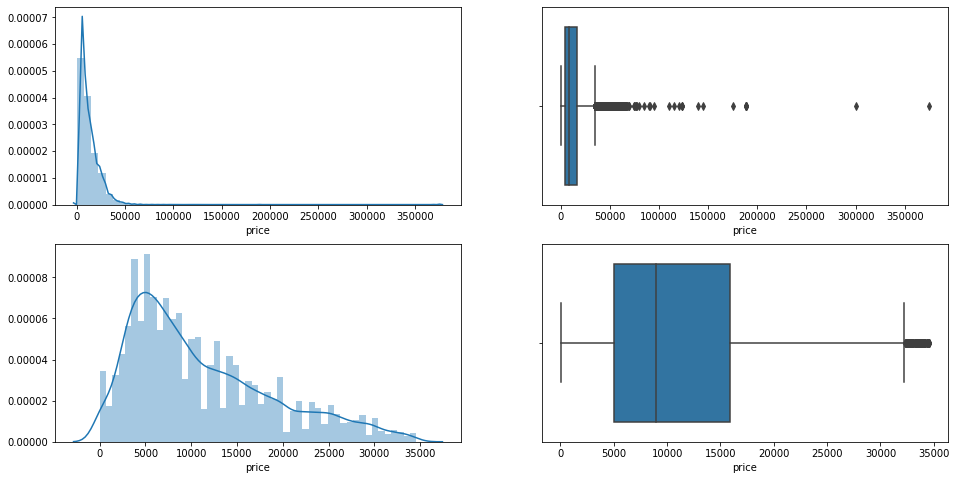

In [44]:
#subplot or ogrinal vs outlier removed graph
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['price'])
plt.subplot(2,2,2)
sns.boxplot(df['price'])
plt.subplot(2,2,3)
sns.distplot(df_new['price'])
plt.subplot(2,2,4)
sns.boxplot(df_new['price'])
plt.show()

The top row histogram and boxplot represent outliers in the original dataset. With the histogram and boxplot below being the filtered one with outliers gone. We can see how hour data is more smooth and the prices have been condensed and are not streched as it was orginally.

#### Outliers removed from Odometer<a class="anchor" id="outlier_odometer"></a>

In [45]:
# Selecting parameter to remove outler from odometer
df_new1 = remove_outlier(df_new, 'odometer')

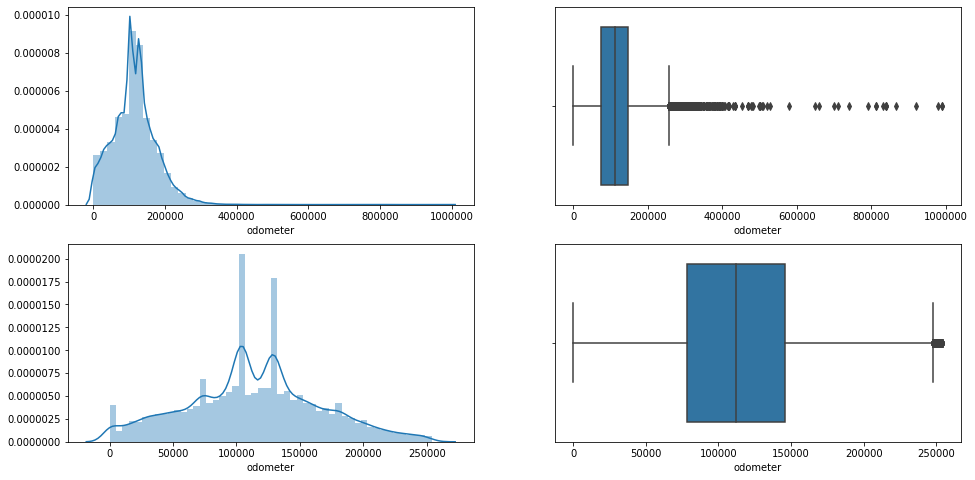

In [46]:
#subplot or ogrinal vs outlier removed graph
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['odometer'])
plt.subplot(2,2,2)
sns.boxplot(df['odometer'])
plt.subplot(2,2,3)
sns.distplot(df_new1['odometer'])
plt.subplot(2,2,4)
sns.boxplot(df_new1['odometer'])
plt.show()

The top row histogram and boxplot represent outliers in the original dataset for the odometer. With the histogram and boxplot below being the filtered one with outliers gone we can see how our data is more smooth. Our boxplot shows the parameter range having fewer outliers present and the dataset range has been condensed.

#### Outliers Removed from avg_mil_year<a class="anchor" id="outlier_avg_mil_year"></a>

In [47]:
# Selecting parameter to remove outler from avg_mil_year
df_new2 = remove_outlier(df_new1, 'avg_mil_year')

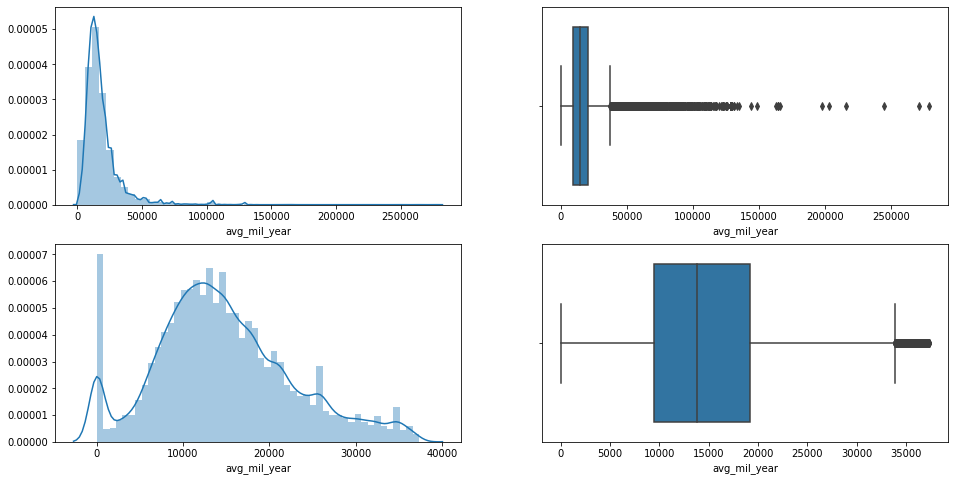

In [48]:
#subplot or ogrinal vs outlier removed graph
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['avg_mil_year'])
plt.subplot(2,2,2)
sns.boxplot(df['avg_mil_year'])
plt.subplot(2,2,3)
sns.distplot(df_new2['avg_mil_year'])
plt.subplot(2,2,4)
sns.boxplot(df_new2['avg_mil_year'])
plt.show()

The top row histogram and boxplot represent outliers in the original dataset for avg_mil_year. With the histogram and boxplot below being the one that has the outliers being filters out. With the graphs being the cleaned data we can see how the sharp peak on 0 has reduced in the photograph and how the range for parameters is smaller than the original through resizing.

In [49]:
#resetting our index after removing the outliers
df_final = df_new2.reset_index(drop=True, inplace=False)

### Days advertisements were displayed <a class="anchor" id="days_advertisted"></a>

Text(0.5, 1.0, 'Histogram of Days Listed')

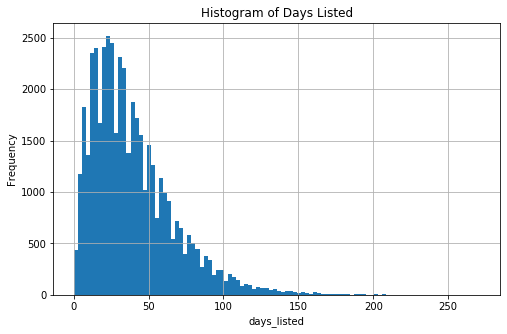

In [50]:
'''
task completed: "Study how many days advertisements were displayed (days_listed). 
Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. 
Determine when ads were removed quickly, and when they were listed for an abnormally 
long time. "
'''

df_final.hist('days_listed',bins = 100, figsize = (8,5))
plt.xlabel('days_listed')
plt.ylabel('Frequency')
plt.title("Histogram of Days Listed")

This histogram showed that the max time a vehicle was listed in an ad is about 270 days. In addition, the graph a typical lifetime of an ad is usually between 30-40 days which is about 1 month. The graph is also shaped in a positive right-skewed distribution.

In [51]:
df_final['days_listed'].describe()

count    45981.000000
mean        39.550314
std         28.240771
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [52]:
print('The mean for days listed is {}, and the median is {}'
      .format(df_final['days_listed'].mean(),df_final['days_listed'].median()))

The mean for days listed is 39.550314260237926, and the median is 33.0


In [53]:
(df_final
 .query(' 1 <= days_listed <= 150')
 .pivot_table(index = 'type', values = 'days_listed', aggfunc = ['count','mean'])
 .sort_values(by = 'type', ascending = False)
 #.plot(grid=True, figsize=(12, 5))
)

,count,mean
,days_listed,days_listed
type,,
wagon,1424,39.083567
van,542,38.968635
truck,10283,39.067879
sedan,11247,38.841824
pickup,5966,38.568052
other,234,36.829060
offroad,197,39.624365
mini-van,1063,38.502352


We can see how trucks, pickup, and SUVs, and sedans make up the majority of vehicles listed on ads. In addition, the truck mean days listed is 38 days, sedans, SUV had a mean average of around 38-39 days.

In [54]:
# vehicles with shortest listing time
shortest_days_listed = df_final.query('days_listed <= 1')
shortest_days_listed.shape

(205, 18)

In [55]:
# vehicles with longest listing time
longest_days_listed = df_final.query('days_listed > 150')
longest_days_listed.shape

(228, 18)

We can see here that there was 164 vehicles with shortest listing time of 1 days. For the longest listing time for vehicals there was 185 vehicales listed for more then 150 days.

#### Analyze numer of ads and average price for vehicle. <a class="anchor" id="analyze_price"></a>
task completed: "Analyze the number of ads and the average price for each type of vehicle. 
Plot a graph showing the dependence of the number of ads on the vehicle type. 
Select the two types with the greatest number of ads. "

In [56]:
#pivot table to analyze number of ads and avg price for each vehicle
number_ads = df_final.pivot_table(index='type', values='price', aggfunc=['count','mean'])
number_ads

,count,mean
,price,price
type,,
SUV,11324,10116.419022
bus,24,17135.666667
convertible,414,12373.012077
coupe,2101,12896.106140
hatchback,978,6658.159509
mini-van,1070,7737.141121
offroad,198,13072.732323
other,235,10096.357447


We can see Bus's have the highest mean price with the least amount of vehicles. While, SUV and sedans have the most number of ads, but it SUV who's price are higher then sedan.

Text(0.5, 1.0, 'Boxplot vehical type by price')

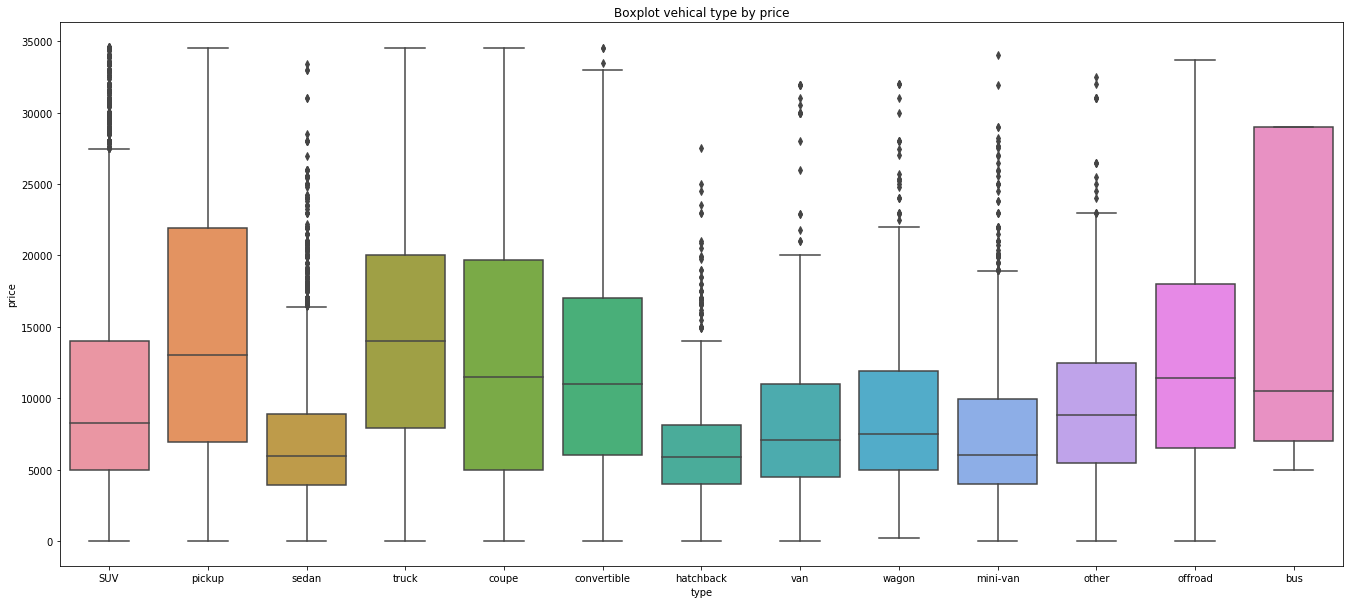

In [57]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="type", y="price", data=df_final)
plt.title("Boxplot vehical type by price")

The following vehicle that have the mean higher price are truck, pickup, couple, and offroad. With hatchback having the smallest price.

#### Average price for each type of vehicle <a class="anchor" id="avg_price"></a>

Text(0, 0.5, 'average price')

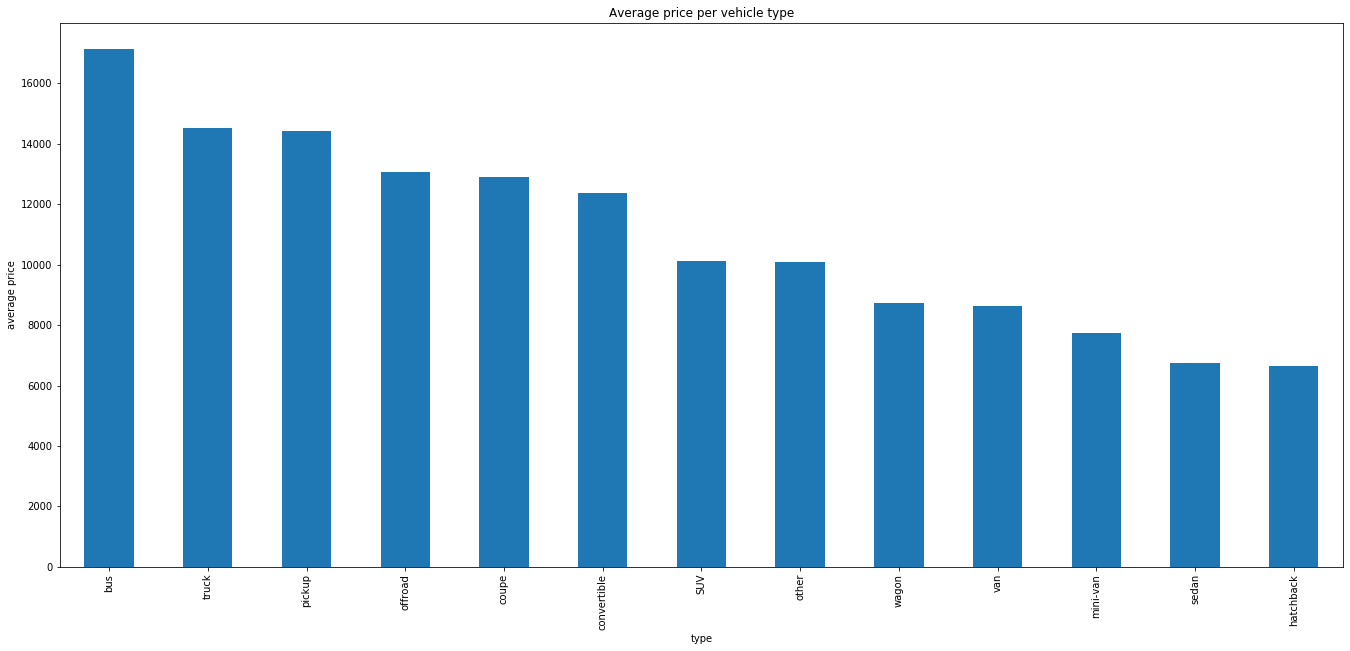

In [58]:
#plot for mean avg of each vehical type
number_ads['mean'].sort_values(by='price', ascending=False).plot(kind='bar', legend=False)
plt.title('Average price per vehicle type')
plt.ylabel('average price')

From the bar chart, we can see that the bus, pickup, truck, offroad, couple, and convertible are the vehicles which cost the most. These vehicle prices are all over the 12000. While sedan and hatchback are the two cars which cost the least being under 6000.

#### Plot the number of ads on the vehicle type<a class="anchor" id="ads_vehicle"></a>

Text(0, 0.5, 'number of ads')

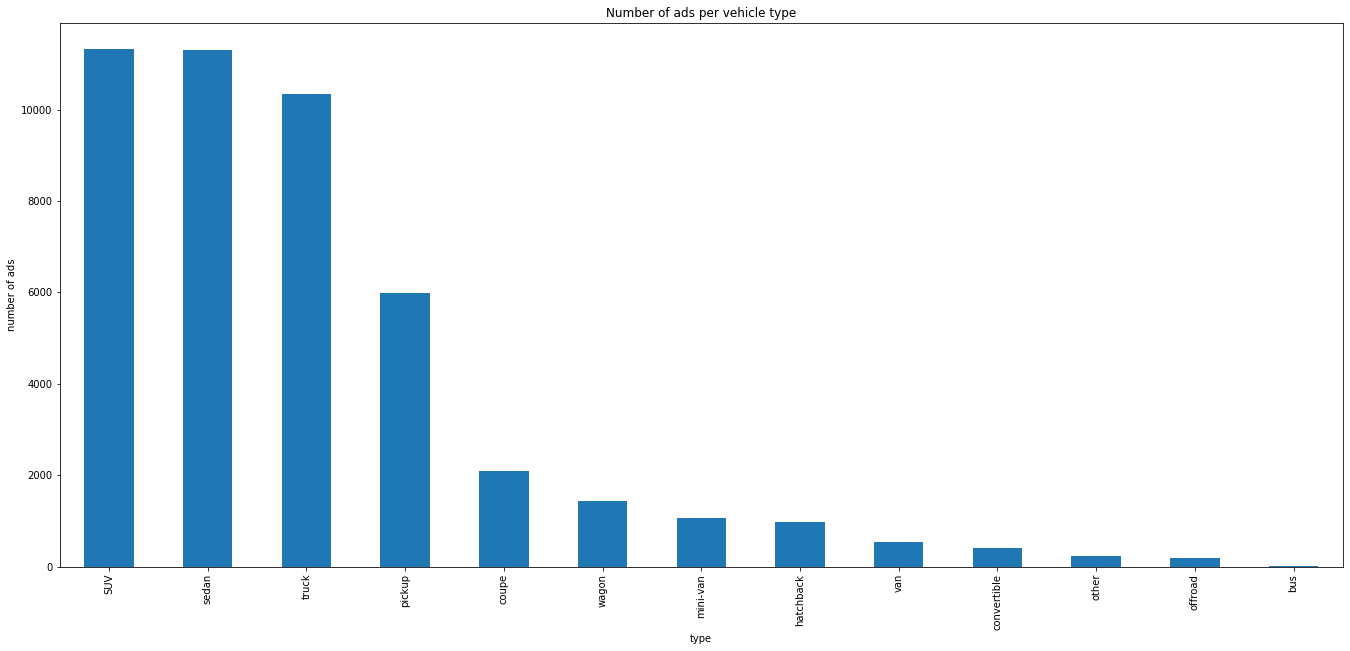

In [59]:
#plot for ads and vehical type
number_ads['count'].sort_values(by='price', ascending=False).plot(kind='bar', legend = False)
plt.title('Number of ads per vehicle type')
plt.ylabel('number of ads')

The vehicles that are seen with the most ad posting are SUVs, sedans, trucks. The vehicles that are shown with the least ad posting are buses foloowed by offroad, convertible, van, hatchback,mini-van,wagon,couple. The reason why they are not many ads for the buses is that most people did buy or sell buses and even if they are sold it is a rare occurrence that you see an ad for one. 

#### Select the two types with the greatest number of ads. <a class="anchor" id="num_ads"></a>

In [60]:
#selecting 2 cars which have the greatest number of ads fron car model
most_ad_car = df_final[df_final['type'].isin(['SUV', 'sedan'])]
most_ad_car.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,month,year,vehicle_age,avg_mil_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,missing,True,2018-06-23,19,5,6,2018,7,20714
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,18333
4,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2,6,2018,4,14488
5,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,3,12,2018,3,26404
6,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,0,1,2019,6,18245


Based on the graphs below we can see that SUVs and Sedans are the two categories which have the greatest number of ads.

#### "What factors impact the price most? <a class="anchor" id="important_price"></a>

Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis. "

###### Model_year vs Price<a class="anchor" id="model_year_price"></a>

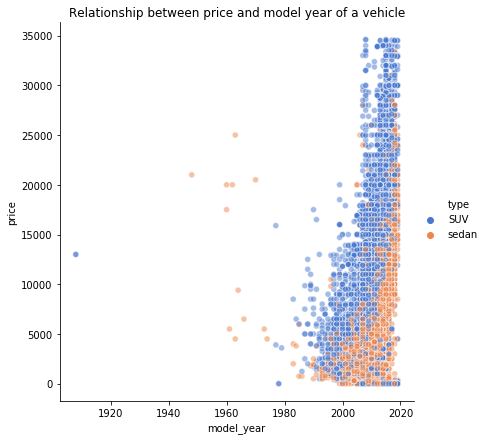

In [62]:
# scatter plot of suv and sedans realtion for model_year vs price
sns.relplot(x="model_year", y="price", hue="type",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=most_ad_car)
plt.title('Relationship between price and model year of a vehicle');

We can see how older sedans from 2000 seem to have a lower price range while as 2020 approaches the sedan seem to be range higher in price and this is to be expected since newer cars are worth more than older ones. For SUV's we can see how even from 2002 to 2020 SUV prices seem to be pricer than sedans. SUVs seem to be more pricer in 2020 than a typical 2020 sedan. 

###### Average milage a year vs Price<a class="anchor" id="avg_mil_price"></a>

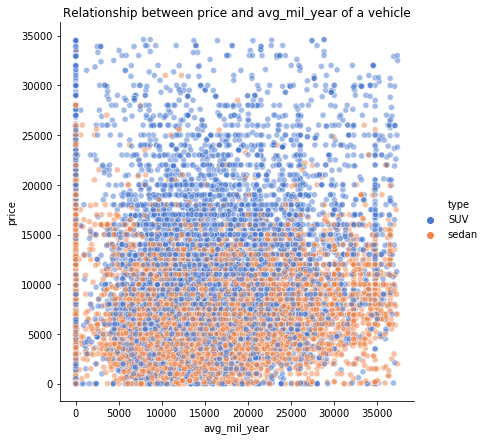

In [63]:
sns.relplot(x="avg_mil_year", y="price", hue="type",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=most_ad_car)
plt.title('Relationship between price and avg_mil_year of a vehicle');

Its hard the tell the correlation between between suv and sedan, but sedans seem cost 15000 and under from milage within 0-40000. In addition, For SUV's seem to be clustered around 5000 to 30000  milage and can go up in price range from 0 - 20000, which is higher then a sedan.

###### Condition vs price<a class="anchor" id="condition_price"></a>

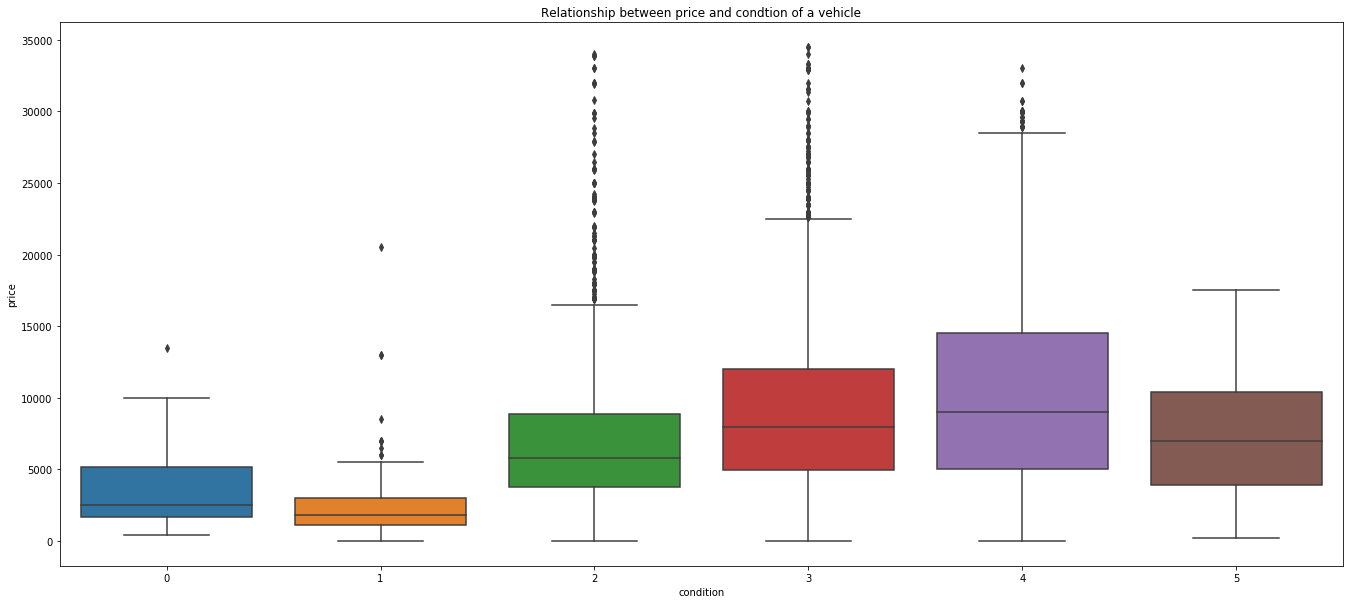

In [64]:
new = most_ad_car.query('days_listed >= 50')
sns.boxplot(x='condition', y='price', data=new)
plt.title('Relationship between price and condtion of a vehicle');

Condition 2, and 3 seem to have a lot of vehicles in that condition. The better the condition the higher the price. Condition 5 seems to have a lower price compared to condition 4. This could the there are not enough cars in that condition so the average is a little lower. In addition, condtion 4 is the one with the highest mean price compared to all other conditions.  

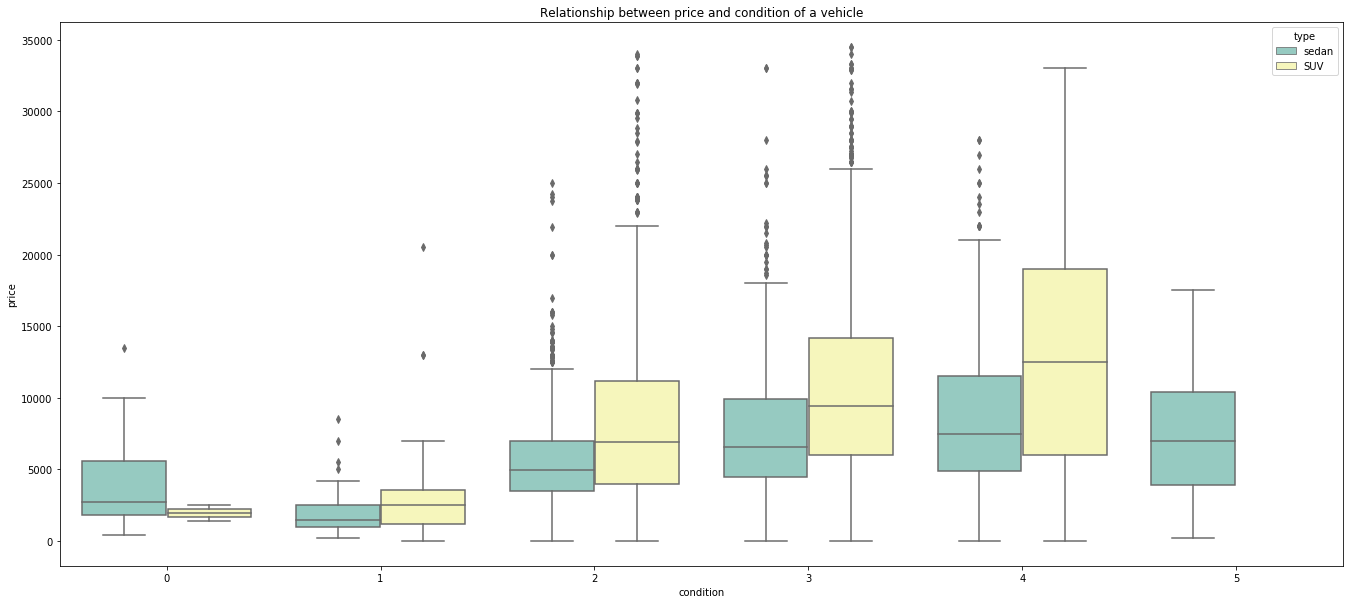

In [65]:
# Condition Vs price
new = most_ad_car.query('days_listed >= 50')
sns.boxplot(x="condition", y="price", hue="type", data=new, palette="Set3")
plt.title('Relationship between price and condition of a vehicle');

Condtions: 'new':5, 'like new':4 ,'excellent': 3, 'good': 2, 'fair':1, 'salvage': 0
- SUV and Sedans:
   * Condition 0(salvage): Sedans seem to fold a high average of around 3000 prices for a salved condition. While SUV seems to be nonexistent.
   * Condition 1(Fair): Both SUVs and Sedans are under 8000. SUVs seem to have a higher mean price than sedans.
   * Condition 2(good): Sedans are being sold at a starting range of around 5000 to 13,000. While SUVs starting range around 8000 to 22000. While some SUVs and Sedans can go for higher.
   * Condition 3(excellent): SUVs seem to go as high as 25000, and Sedans seem to go as high as 18000. 
   * Condition 4(like new): SUVs have the highest mean price in this condition and it seems that SUVs can go as high as 33000. While Sedans mean average starting price seems to be around 8000 to 20000 and higher. 
   * Condition 5(new): Sendas seem to hold a relatively high mean for a new car. We don't see Suv being listed. This could be because not many people list SUV cars or there was a very small amount for people listing in that condition.
   
   
Overall, the trend is shown that newer vehicles are worth more if they are in better condition compared to older vehicles. 

###### Cylinders vs Price<a class="anchor" id="cylinders_price"></a>

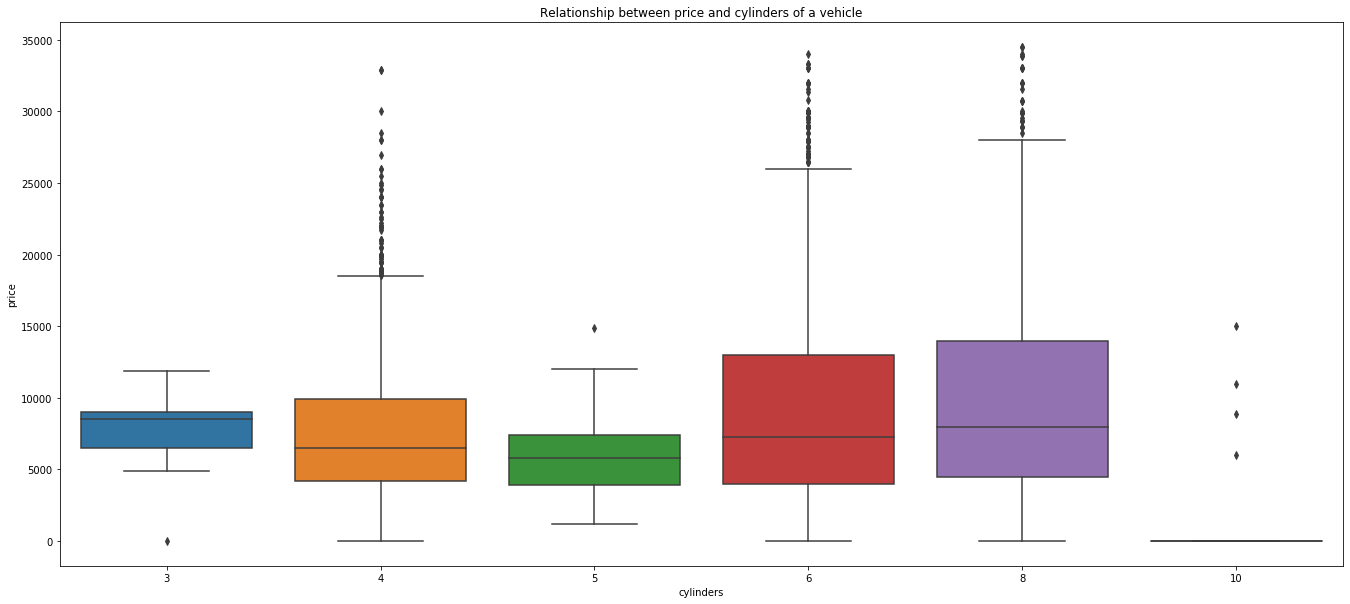

In [66]:
new = most_ad_car.query('days_listed >= 50')
sns.boxplot(x='cylinders', y='price', data=new)
plt.title('Relationship between price and cylinders of a vehicle');

Cylinders 6, and 8 seem to be worth the most in price compared to all other cylinders. With cylinder 8 being the one taht cost the most out of all the cylinders

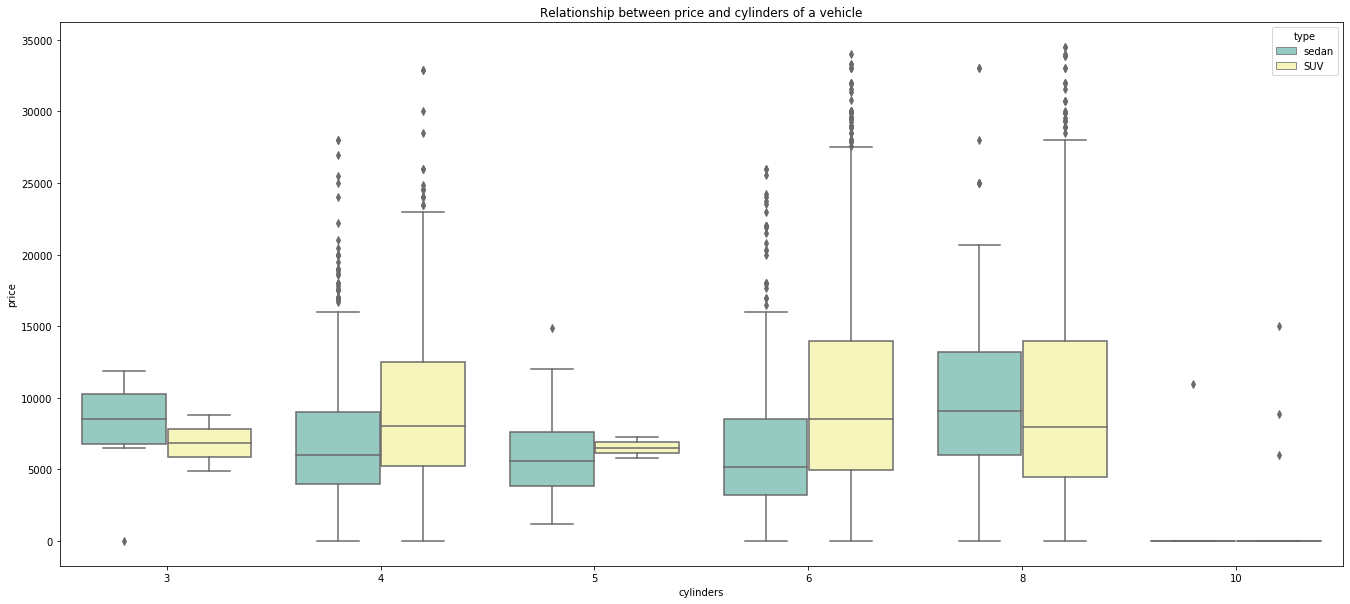

In [67]:
sns.boxplot(x="cylinders", y="price", hue="type", data=new, palette="Set3")
plt.title('Relationship between price and cylinders of a vehicle');

Cylinders for SUVs in categories 8,4, and 6 seem to have a higher price than those of Sedans. We can see how in cylinder 8 price for Sedans seem to be higher than any other cylinder, and it shows that it is a higher mean price than a SUV.

###### is_4wd vs price <a class="anchor" id="is_4wd_price"></a>

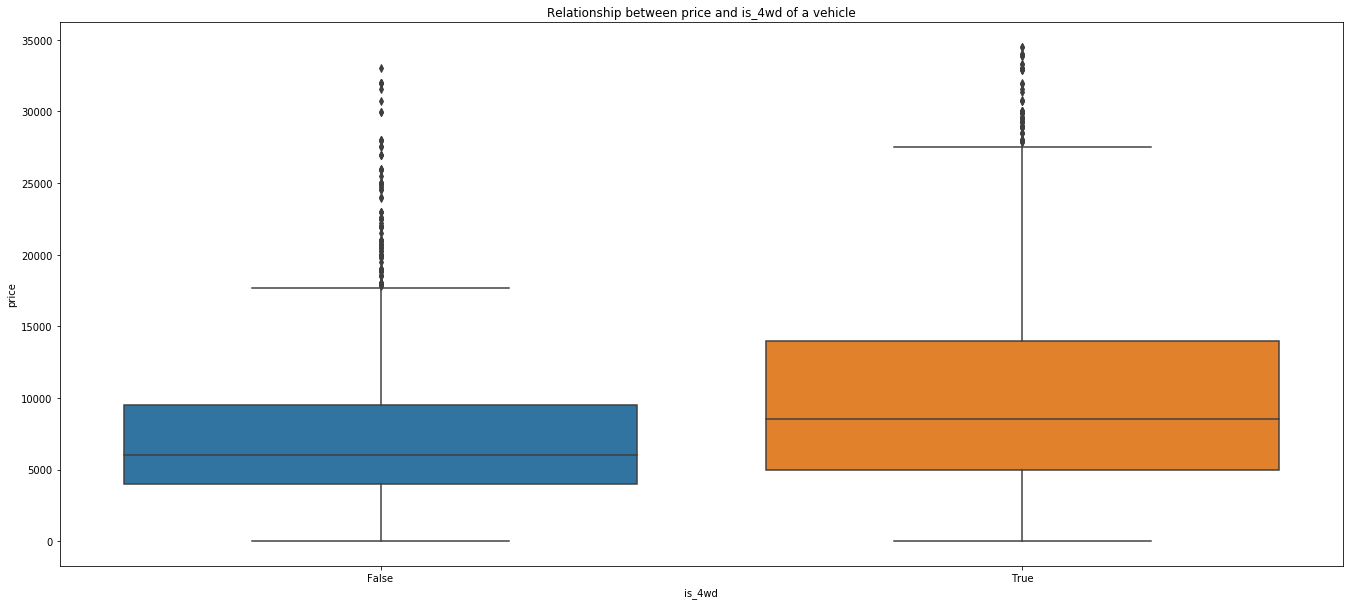

In [68]:
new = most_ad_car.query('days_listed >= 50')
sns.boxplot(x='is_4wd', y='price', data=new)
plt.title('Relationship between price and is_4wd of a vehicle');

We can see that 4 door wheels do better than not being a 4 door wheel for vehicles of sedan and SUVs. Prices for 4 door wheel are much higher for those vehicles vs ones who are not are lower.

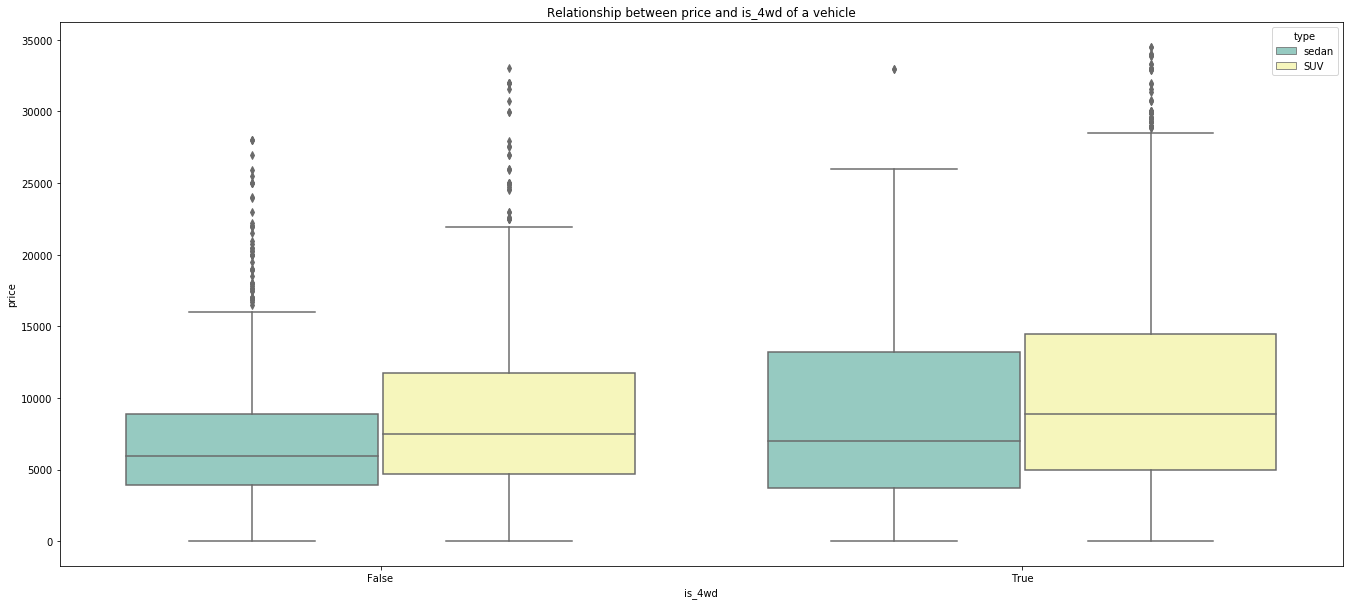

In [69]:
#is_4wd vs price
sns.boxplot(x="is_4wd", y="price", hue="type", data=new, palette="Set3")
plt.title('Relationship between price and is_4wd of a vehicle');

Both SUVs and Sedans have a higher mean average for vehicles that are 4 wheel doors compared to those that arent 4 wheel doors. With Sedans that are not 4 wheel doors, we can see that they have a lower mean price and SUVs which have higher mean prices.

Overall, Both Sedans and SUV's prices are higher if they are 4 door vehicles.

###### vehicle_age vs price <a class="anchor" id="vehicle_age_price"></a>

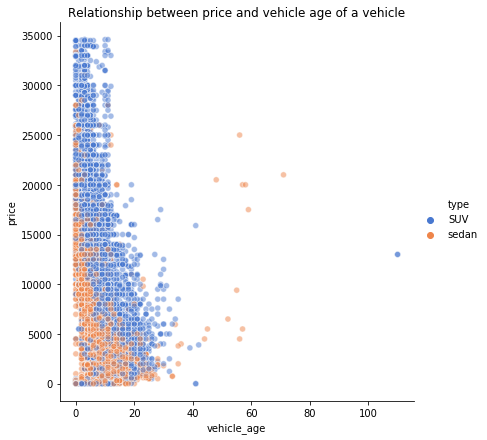

In [70]:
#vehicle_age vs price scatterplot
sns.relplot(x="vehicle_age", y="price", hue="type",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=most_ad_car)
plt.title('Relationship between price and vehicle age of a vehicle');

Vehicles that are brand new for a sedan can go as high as 28000. While brand new SUVs can go as high as 30000. We can see as vehicles age their prices go down and the price of sedan seem to get small as they age longer. This is the same for SUVs as well. In addition, what's interesting to note is that SUVs seem to be worth more compared to a sedan's price as it ages.

###### odometer vs price<a class="anchor" id="odometer_price"></a>

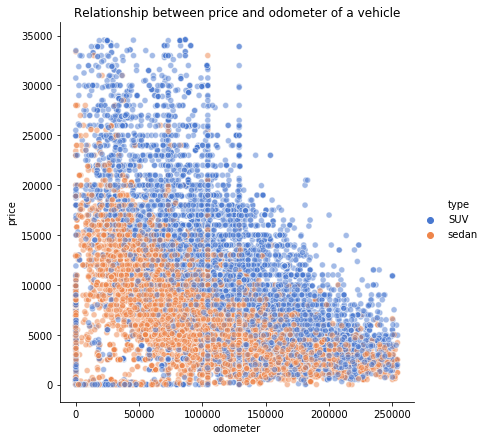

In [71]:
# mileage(odometer) vs price scatterplot
sns.relplot(x="odometer", y="price", hue="type",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=most_ad_car)
plt.title('Relationship between price and odometer of a vehicle');

Sedans and SUVs both seem to be worth a lot more in price if they have less mileage. We can see that as the milages increases from 100000 to 250000 the price for a sedan seem to decrease. While this is the same case for SUVs. Furthermore,  SUVs'  seem to be worth a little bit more money compared to sedans even with more milage on them. 

###### transmission vs price<a class="anchor" id="transmission_by_price"></a>

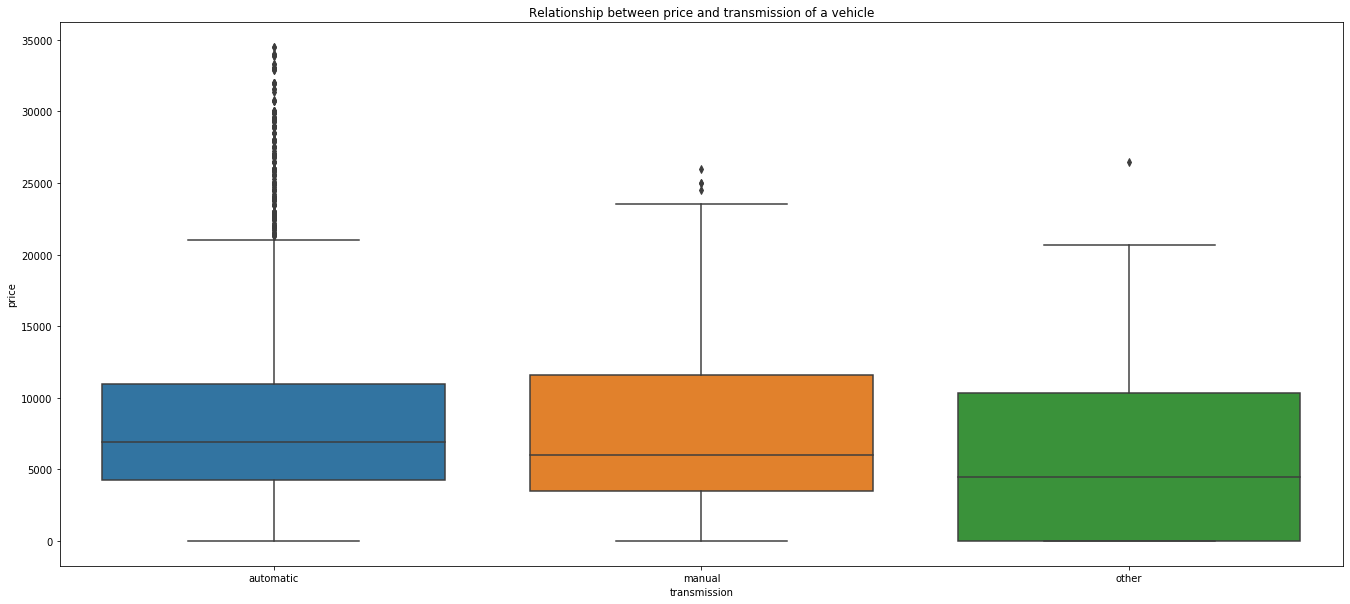

In [72]:
plt.rcParams['figure.figsize']=(23,10)
car = most_ad_car.query('days_listed >= 50')
ax = sns.boxplot(x="transmission", y="price", data=car)
plt.title('Relationship between price and transmission of a vehicle');

This is a boxplot representing the relation between transmission and price listed on ads for at least 50 days. We can see how automatic cost more on average than a manual car. This could be that automatic are popular cars and are easy to use for new car beginners and are less complicated than a manual.

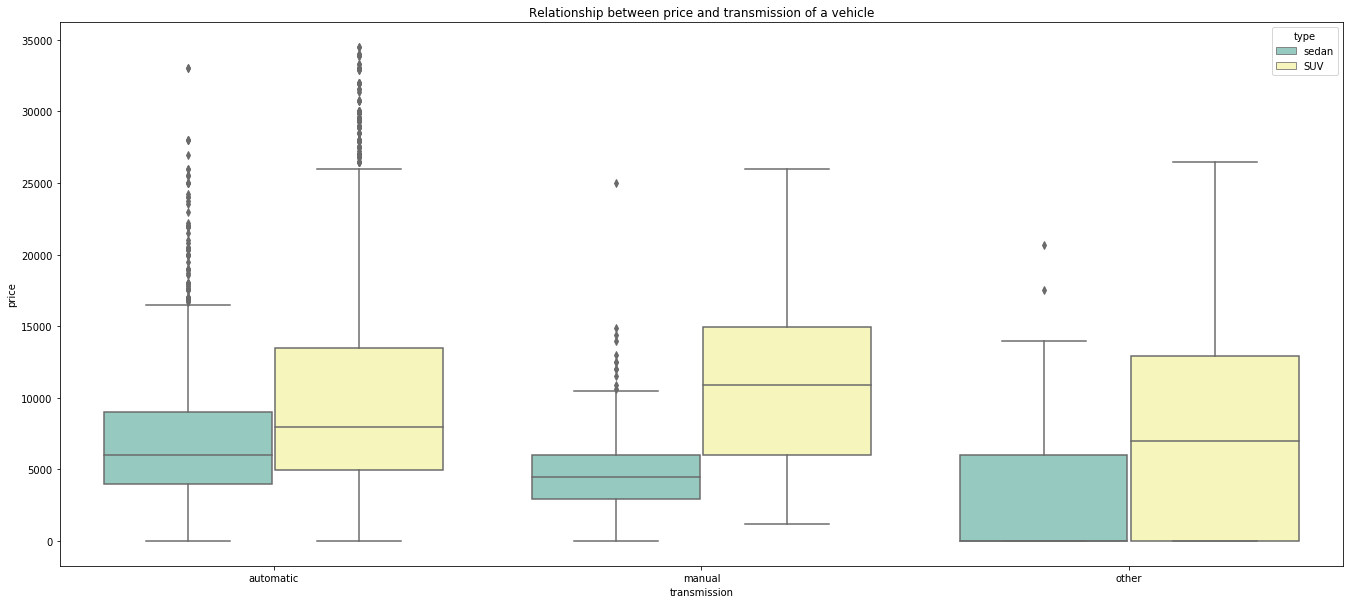

In [73]:
#creating a new dataframe for our selected days 
new = most_ad_car.query('days_listed >= 50')
#creating boxplot for paint color and price
sns.boxplot(x="transmission", y="price", hue="type", data=new, palette="Set3")
plt.title('Relationship between price and transmission of a vehicle');

These boxplots are a further look into the difference between a sedan and SUV cars. For a sedan, an automatic vehicle is popular than a manual. The price for an automatic sedan is higher than a manual. For an SUV we can see that manuals hold a higher mean average price for their cars than a manual.

Overall, for a sedan, an automatic car seems to be more pricer than a manual, and for SUV a manual will cost more.

######  Color vs price<a class="anchor" id="color_by_price"></a>

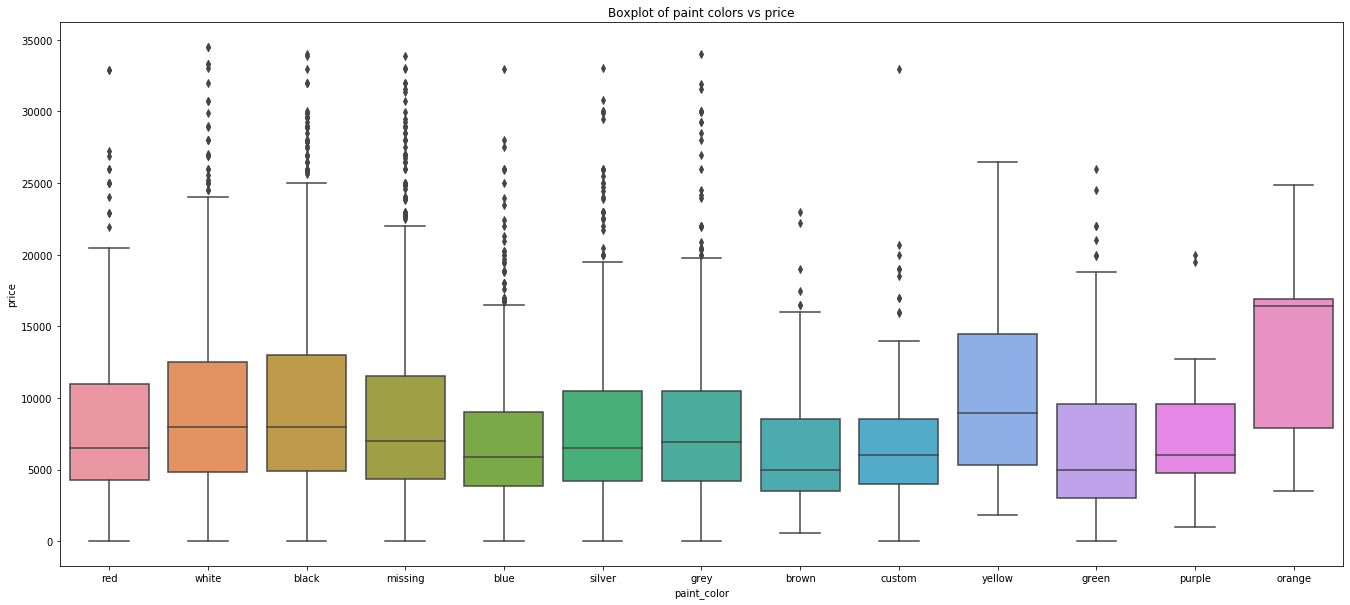

In [74]:
# Color vs price boxplot

car = most_ad_car.query('days_listed >= 50')
ax = sns.boxplot(x="paint_color", y="price", data=car)
plt.title('Boxplot of paint colors vs price')
plt.ylabel('price')
plt.show();

This boxplot shows how black, white, yellow, and orange seem to have a higher mean average price for the vehicle. With orange being the color with the highest mean average price. We will look into further analysis.

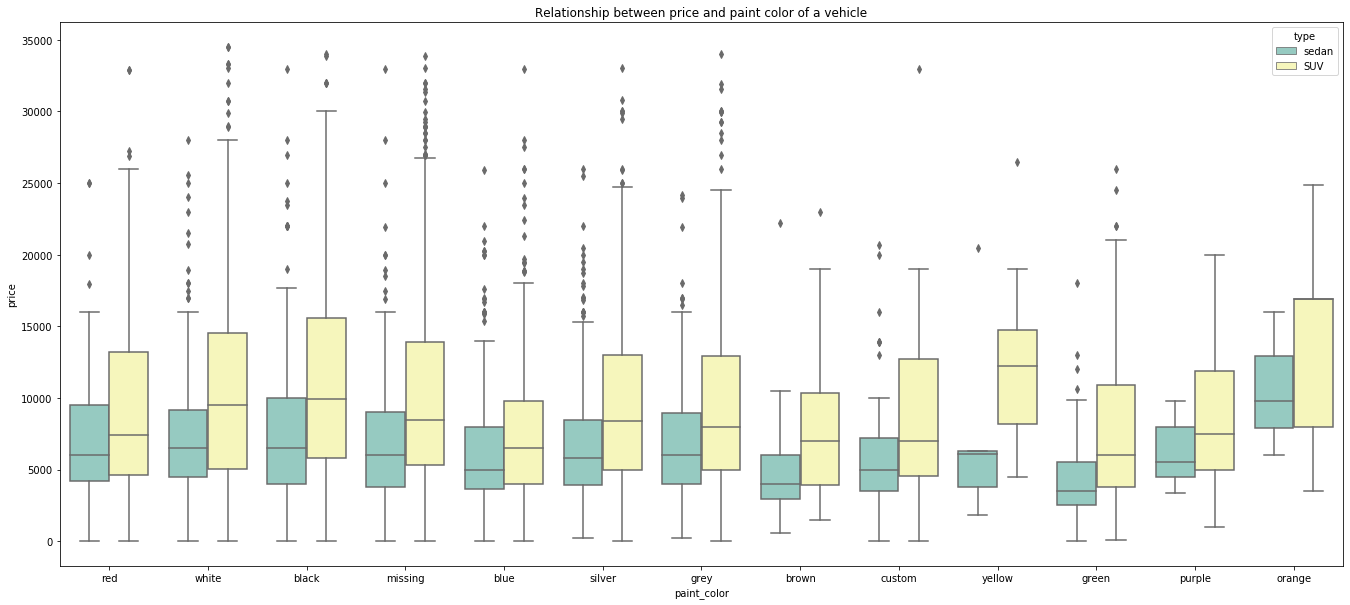

In [75]:
#creating a new dataframe for our selected days 
new = most_ad_car.query('days_listed >= 50')
#creating boxplot for paint color and price
sns.boxplot(x="paint_color", y="price", hue="type", data=new, palette="Set3")
plt.title('Relationship between price and paint color of a vehicle');

For SUV's we can see that the color black, white, silver, grey, and red seem to be more popular and cost more than Sedan colors. For Sedans there paint colors are relatively cheaper than an SUV and are all under 15000 for color. With the exception of orange being the having a higher price for Sedans and SUV's. In addition and black being a popular color with a higher average mean price and yellow paint color having the intial average mean value price range being the highest for SUV's. In addition, brown is the least favorite color for sedans, followed by yellow and most poplar being black.

For SUVs, we can see that price does matter for a colored sedan car. Black color sedan seems to be a very popular color which makes the car worth more. As for Sedans colors don't play a big impact since the majority of all colors seem to cost the same amount.

###### Conclusion<a class="anchor" id="conclusion1"></a>

Overall, we can see that price does depend on age, mileage, condition, transmission type, 4 door wheel, and model year. From the analysis, we were able to see how two cars can cost more and less based on these factors and how even if they have more mileage than others, etc, they can still affect cars listing price. Moreover, from the analysis, we were able to see sedans and SUVs against these criteria and found that SUVs seem to cost more overall than a Sedan from these factors.

## Overall conclusion<a class="anchor" id="Overall_conclusion"></a>

From the data preprocessing stage, we have been able to successfully identify missing values and fill/drop them appropriately. In addition, we have created further data columns in the data set to analyze the time and days for ads listed. This was an important step to understand the durations of ads and how long a listing usually takes. In addition, we were able to remove outliers and create visuals for our data for further analysis. From the analysis, we were able to observe how Sedans and SUVs are the two categories that generate the greatest number of ads. From finding these two vehicles that generate the most ads we were able to see how other factors such as price, condition, transmission, model year, and if it's a 4 door vehicle impact the price of a car. 

Overall, from this analysis, we were able to see how certain factors are very important and are shown to influence the price of vehicles. For Crankshaft List to improve its business and to know which factors impact their prices they need to look at the factors below when improving their business for listing.

Important factors:
- condition, vehical_age, mileage, is_4wd, cylinders, transmission type , model_year

# Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn